# Movies Data Analysis for Global Cinemas  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Acquire Data

In [2]:
imdb_movies=pd.read_excel(r'C:\Users\nojil\Desktop\imdb_movies.xlsx')

In [3]:
imdb_movies

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes
0,John Blanchard,65.0,Andrea Martin,NaN,Comedy,Comedy,Martin Short,Towering InfernoÂ,10,Joe Flaherty,NaN,http://www.imdb.com/title/tt0691996/?ref_=fn_t...,English,Canada,NaN,NaN,9.5,NaN,0
1,Frank Darabont,142.0,Jeffrey DeMunn,28341469.0,Crime,Crime|Drama,Morgan Freeman,The Shawshank RedemptionÂ,1689764,Bob Gunton,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,English,USA,25000000.0,1994.0,9.3,0.000005,108000
2,Francis Ford Coppola,175.0,Marlon Brando,134821952.0,Crime,Crime|Drama,Al Pacino,The GodfatherÂ,1155770,Robert Duvall,crime family|mafia|organized crime|patriarch|r...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,English,USA,6000000.0,1972.0,9.2,0.000008,43000
3,NaN,55.0,Olaf Lubaszenko,447093.0,Drama,Drama,Krystyna Janda,DekalogÂ,12590,Olgierd Lukaszewicz,meaning of life|moral challenge|morality|searc...,http://www.imdb.com/title/tt0092337/?ref_=fn_t...,Polish,Poland,NaN,NaN,9.1,0.000723,0
4,NaN,55.0,Olaf Lubaszenko,447093.0,Drama,Drama,Krystyna Janda,DekalogÂ,12591,Olgierd Lukaszewicz,meaning of life|moral challenge|morality|searc...,http://www.imdb.com/title/tt0092337/?ref_=fn_t...,Polish,Poland,NaN,NaN,9.1,0.000723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Jason Friedberg,88.0,Tony Cox,14174654.0,Comedy,Comedy,Carmen Electra,Disaster MovieÂ,74945,Ike Barinholtz,disaster|glass|mousetrap|natural disaster|scat...,http://www.imdb.com/title/tt1213644/?ref_=fn_t...,English,USA,25000000.0,2008.0,1.9,0.000025,0
5039,Bob Clark,88.0,Vanessa Angel,9109322.0,Comedy,Comedy|Family|Sci-Fi,Scott Baio,Superbabies: Baby Geniuses 2Â,25371,Peter Wingfield,computer|good versus evil|mind control|science...,http://www.imdb.com/title/tt0270846/?ref_=fn_t...,English,Germany,20000000.0,2004.0,1.9,0.000075,0
5040,A. Raven Cruz,97.0,Vanilla Ice,NaN,Action,Action|Adventure|Comedy|Fantasy|Sci-Fi,Scott Levy,The Helix... LoadedÂ,534,Jennifer Sky,cnn reporter|ellipsis in title|matrix|punctuat...,http://www.imdb.com/title/tt0401462/?ref_=fn_t...,English,USA,1000000.0,2005.0,1.9,0.003558,128
5041,Lawrence Kasanoff,91.0,Larry Miller,NaN,Action,Action|Animation|Comedy|Family|Fantasy,Jerry Stiller,Foodfight!Â,4377,Harvey Fierstein,femme fatale|food|pun|supermarket|troubled pro...,http://www.imdb.com/title/tt0249516/?ref_=fn_t...,English,USA,65000000.0,2012.0,1.7,0.000388,0


## Describing Dataset

In [4]:
imdb_movies.shape

(5043, 19)

In [5]:
print(imdb_movies.columns.values)

['director_name' 'duration' 'actor_2_name' 'gross' 'Main genres' 'genres'
 'actor_1_name' 'movie_title' 'num_voted_users' 'actor_3_name'
 'plot_keywords' 'movie_imdb_link' 'language' 'country' 'budget'
 'title_year' 'imdb_score' 'Adjusted' 'movie_facebook_likes']


In [6]:
imdb_movies.isnull().values.any() 

True

In [7]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
director_name           4939 non-null object
duration                5028 non-null float64
actor_2_name            5030 non-null object
gross                   4159 non-null float64
Main genres             5043 non-null object
genres                  5043 non-null object
actor_1_name            5036 non-null object
movie_title             5043 non-null object
num_voted_users         5043 non-null int64
actor_3_name            5020 non-null object
plot_keywords           4890 non-null object
movie_imdb_link         5043 non-null object
language                5031 non-null object
country                 5038 non-null object
budget                  4551 non-null float64
title_year              4935 non-null float64
imdb_score              5043 non-null float64
Adjusted                5042 non-null float64
movie_facebook_likes    5043 non-null int64
dtypes: float64(6), int64(2), obje

In [8]:
imdb_movies[imdb_movies.columns[:]].isnull().sum()#.plot(kind='bar')

director_name           104
duration                 15
actor_2_name             13
gross                   884
Main genres               0
genres                    0
actor_1_name              7
movie_title               0
num_voted_users           0
actor_3_name             23
plot_keywords           153
movie_imdb_link           0
language                 12
country                   5
budget                  492
title_year              108
imdb_score                0
Adjusted                  1
movie_facebook_likes      0
dtype: int64

## Data Wrangling

In [9]:
imdb_movies.drop_duplicates(inplace=True)

In [10]:
imdb_movies["gross"].fillna(0, inplace=True)
imdb_movies["budget"].fillna(0, inplace=True)
imdb_movies["title_year"].fillna(0, inplace=True)
imdb_movies["duration"].fillna(0, inplace=True)
imdb_movies["country"].fillna("NaN", inplace=True)

In [11]:
imdb_movies.columns=imdb_movies.columns.str.strip()

In [12]:
imdb_movies.columns

Index(['director_name', 'duration', 'actor_2_name', 'gross', 'Main genres',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language',
       'country', 'budget', 'title_year', 'imdb_score', 'Adjusted',
       'movie_facebook_likes'],
      dtype='object')

In [13]:
imdb_movies.drop(imdb_movies[-(imdb_movies["country"].str.contains("USA"))].index, inplace=True)

In [14]:
imdb_movies.drop(imdb_movies[imdb_movies.title_year <= 1996].index, inplace=True)

In [15]:
imdb_movies.head()

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes
5,John Stockwell,90.0,T.J. Storm,0.0,Action,Action,Matthew Ziff,Kickboxer: VengeanceÂ,246,Sam Medina,NaN,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,NaN,USA,17000000.0,2016.0,9.1,0.036992,0
6,Christopher Nolan,152.0,Heath Ledger,533316061.0,Action,Action|Crime|Drama|Thriller,Christian Bale,The Dark KnightÂ,1676169,Morgan Freeman,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,English,USA,185000000.0,2008.0,9.0,0.000005,37000
9,Peter Jackson,192.0,Billy Boyd,377019252.0,Action,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the KingÂ,1215718,Bernard Hill,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,English,USA,94000000.0,2003.0,8.9,0.000007,16000
14,Christopher Nolan,148.0,Tom Hardy,292568851.0,Action,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,InceptionÂ,1468200,Joseph Gordon-Levitt,ambiguous ending|corporate espionage|dream|sub...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,English,USA,160000000.0,2010.0,8.8,0.000006,175000
17,David Fincher,151.0,Meat Loaf,37023395.0,Drama,Drama,Brad Pitt,Fight ClubÂ,1347461,Eugenie Bondurant,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,English,USA,63000000.0,1999.0,8.8,0.000007,48000


## Data Analysis

In [16]:
#What is the trend of revenue for movies from 1996 to 2016? Is it a good idea for global cinemas to invest now?

In [17]:
bins=[1996,2001,2006,2011,2016]
imdb_movies['Year Edited'] = pd.cut(imdb_movies['title_year'] , bins = bins )

In [18]:
imdb_movies

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited
5,John Stockwell,90.0,T.J. Storm,0.0,Action,Action,Matthew Ziff,Kickboxer: VengeanceÂ,246,Sam Medina,NaN,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,NaN,USA,17000000.0,2016.0,9.1,0.036992,0,"(2011, 2016]"
6,Christopher Nolan,152.0,Heath Ledger,533316061.0,Action,Action|Crime|Drama|Thriller,Christian Bale,The Dark KnightÂ,1676169,Morgan Freeman,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,English,USA,185000000.0,2008.0,9.0,0.000005,37000,"(2006, 2011]"
9,Peter Jackson,192.0,Billy Boyd,377019252.0,Action,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the KingÂ,1215718,Bernard Hill,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,English,USA,94000000.0,2003.0,8.9,0.000007,16000,"(2001, 2006]"
14,Christopher Nolan,148.0,Tom Hardy,292568851.0,Action,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,InceptionÂ,1468200,Joseph Gordon-Levitt,ambiguous ending|corporate espionage|dream|sub...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,English,USA,160000000.0,2010.0,8.8,0.000006,175000,"(2006, 2011]"
17,David Fincher,151.0,Meat Loaf,37023395.0,Drama,Drama,Brad Pitt,Fight ClubÂ,1347461,Eugenie Bondurant,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,English,USA,63000000.0,1999.0,8.8,0.000007,48000,"(1996, 2001]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Don Michael Paul,93.0,Faizon Love,5694308.0,Comedy,Comedy|Sport,Jeffrey Jones,Who's Your Caddy?Â,13815,Lil' Wayne,2000s|golf caddy|golf course|golfer|question m...,http://www.imdb.com/title/tt0785077/?ref_=fn_t...,English,USA,7000000.0,2007.0,2.0,0.000145,446,"(2006, 2011]"
5038,Jason Friedberg,88.0,Tony Cox,14174654.0,Comedy,Comedy,Carmen Electra,Disaster MovieÂ,74945,Ike Barinholtz,disaster|glass|mousetrap|natural disaster|scat...,http://www.imdb.com/title/tt1213644/?ref_=fn_t...,English,USA,25000000.0,2008.0,1.9,0.000025,0,"(2006, 2011]"
5040,A. Raven Cruz,97.0,Vanilla Ice,0.0,Action,Action|Adventure|Comedy|Fantasy|Sci-Fi,Scott Levy,The Helix... LoadedÂ,534,Jennifer Sky,cnn reporter|ellipsis in title|matrix|punctuat...,http://www.imdb.com/title/tt0401462/?ref_=fn_t...,English,USA,1000000.0,2005.0,1.9,0.003558,128,"(2001, 2006]"
5041,Lawrence Kasanoff,91.0,Larry Miller,0.0,Action,Action|Animation|Comedy|Family|Fantasy,Jerry Stiller,Foodfight!Â,4377,Harvey Fierstein,femme fatale|food|pun|supermarket|troubled pro...,http://www.imdb.com/title/tt0249516/?ref_=fn_t...,English,USA,65000000.0,2012.0,1.7,0.000388,0,"(2011, 2016]"


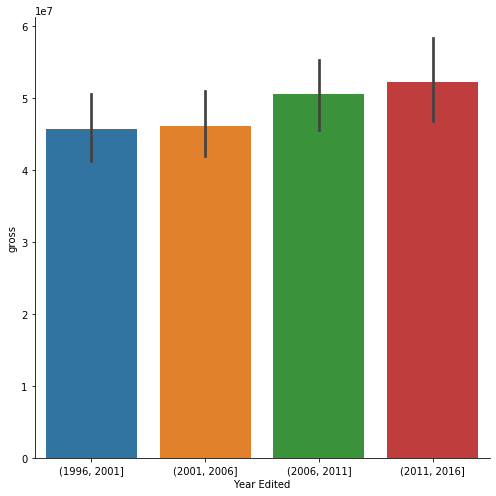

In [64]:
sns.factorplot(x='Year Edited',y='gross',data=imdb_movies,kind='bar',size=7)

In [20]:
# Which genre to produce? Based on movies which was produced in a low  budget but made most revenue.

In [21]:
imdb_movies1=imdb_movies[(imdb_movies['budget']<300000000)& (imdb_movies['gross']>600000000)]

In [45]:
imdb_movies1

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited
184,Joss Whedon,173.0,Robert Downey Jr.,623279547.0,Action,Action|Adventure|Sci-Fi,Chris Hemsworth,The AvengersÂ,995415,Scarlett Johansson,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,English,USA,220000000.0,2012.0,8.1,0.000008,123000,"(2011, 2016]"
328,James Cameron,178.0,Joel David Moore,760505847.0,Action,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9,0.000009,33000,"(2006, 2011]"
509,James Cameron,194.0,Kate Winslet,658672302.0,Drama,Drama|Romance,Leonardo DiCaprio,TitanicÂ,793059,Gloria Stuart,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,English,USA,200000000.0,1997.0,7.7,0.000010,26000,"(1996, 2001]"
1595,Colin Trevorrow,124.0,Judy Greer,652177271.0,Action,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic WorldÂ,418214,Omar Sy,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,English,USA,150000000.0,2015.0,7.0,0.000017,150000,"(2011, 2016]"


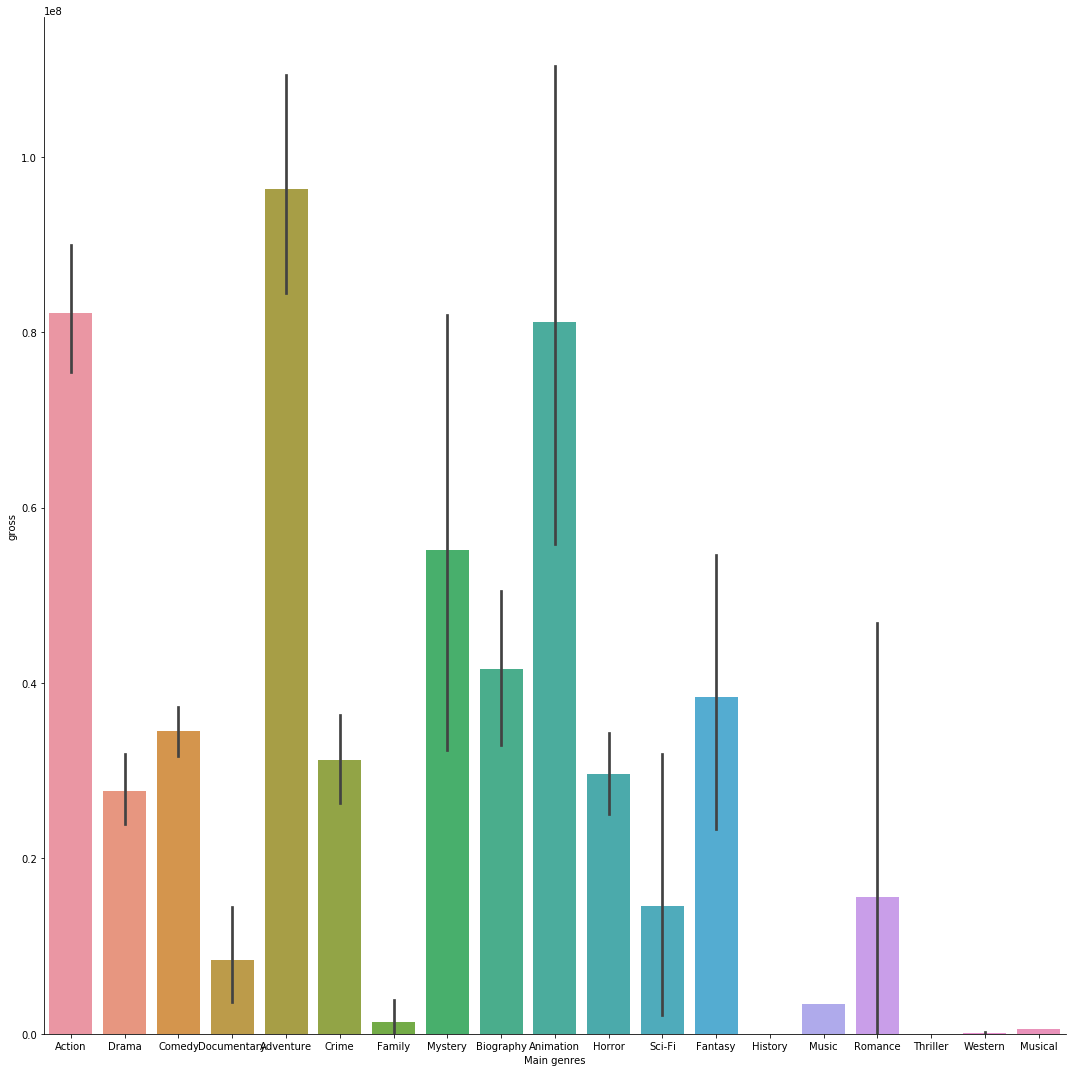

In [44]:
sns.factorplot(x='Main genres',y='gross',data=imdb_movies,kind='bar',size=15)

In [ ]:
# Who all are the best directors based on low budget but high gross amount?

In [22]:
imdb_movies1

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited
184,Joss Whedon,173.0,Robert Downey Jr.,623279547.0,Action,Action|Adventure|Sci-Fi,Chris Hemsworth,The AvengersÂ,995415,Scarlett Johansson,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,English,USA,220000000.0,2012.0,8.1,0.000008,123000,"(2011, 2016]"
328,James Cameron,178.0,Joel David Moore,760505847.0,Action,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9,0.000009,33000,"(2006, 2011]"
509,James Cameron,194.0,Kate Winslet,658672302.0,Drama,Drama|Romance,Leonardo DiCaprio,TitanicÂ,793059,Gloria Stuart,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,English,USA,200000000.0,1997.0,7.7,0.000010,26000,"(1996, 2001]"
1595,Colin Trevorrow,124.0,Judy Greer,652177271.0,Action,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic WorldÂ,418214,Omar Sy,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,English,USA,150000000.0,2015.0,7.0,0.000017,150000,"(2011, 2016]"


In [ ]:
# Best directors based on imdb_score

In [47]:
imdb_movies.sort_values(by='imdb_score',ascending=False)

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited
5,John Stockwell,90.0,T.J. Storm,0.0,Action,Action,Matthew Ziff,Kickboxer: VengeanceÂ,246,Sam Medina,NaN,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,NaN,USA,17000000.0,2016.0,9.1,0.036992,0,"(2011, 2016]"
6,Christopher Nolan,152.0,Heath Ledger,533316061.0,Action,Action|Crime|Drama|Thriller,Christian Bale,The Dark KnightÂ,1676169,Morgan Freeman,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,English,USA,185000000.0,2008.0,9.0,0.000005,37000,"(2006, 2011]"
9,Peter Jackson,192.0,Billy Boyd,377019252.0,Action,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the KingÂ,1215718,Bernard Hill,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,English,USA,94000000.0,2003.0,8.9,0.000007,16000,"(2001, 2006]"
14,Christopher Nolan,148.0,Tom Hardy,292568851.0,Action,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,InceptionÂ,1468200,Joseph Gordon-Levitt,ambiguous ending|corporate espionage|dream|sub...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,English,USA,160000000.0,2010.0,8.8,0.000006,175000,"(2006, 2011]"
17,David Fincher,151.0,Meat Loaf,37023395.0,Drama,Drama,Brad Pitt,Fight ClubÂ,1347461,Eugenie Bondurant,anti establishment|dark humor|fighting|multipl...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,English,USA,63000000.0,1999.0,8.8,0.000007,48000,"(1996, 2001]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Don Michael Paul,93.0,Faizon Love,5694308.0,Comedy,Comedy|Sport,Jeffrey Jones,Who's Your Caddy?Â,13815,Lil' Wayne,2000s|golf caddy|golf course|golfer|question m...,http://www.imdb.com/title/tt0785077/?ref_=fn_t...,English,USA,7000000.0,2007.0,2.0,0.000145,446,"(2006, 2011]"
5038,Jason Friedberg,88.0,Tony Cox,14174654.0,Comedy,Comedy,Carmen Electra,Disaster MovieÂ,74945,Ike Barinholtz,disaster|glass|mousetrap|natural disaster|scat...,http://www.imdb.com/title/tt1213644/?ref_=fn_t...,English,USA,25000000.0,2008.0,1.9,0.000025,0,"(2006, 2011]"
5040,A. Raven Cruz,97.0,Vanilla Ice,0.0,Action,Action|Adventure|Comedy|Fantasy|Sci-Fi,Scott Levy,The Helix... LoadedÂ,534,Jennifer Sky,cnn reporter|ellipsis in title|matrix|punctuat...,http://www.imdb.com/title/tt0401462/?ref_=fn_t...,English,USA,1000000.0,2005.0,1.9,0.003558,128,"(2001, 2006]"
5041,Lawrence Kasanoff,91.0,Larry Miller,0.0,Action,Action|Animation|Comedy|Family|Fantasy,Jerry Stiller,Foodfight!Â,4377,Harvey Fierstein,femme fatale|food|pun|supermarket|troubled pro...,http://www.imdb.com/title/tt0249516/?ref_=fn_t...,English,USA,65000000.0,2012.0,1.7,0.000388,0,"(2011, 2016]"


In [49]:
imdb_movies.loc[:,['director_name','imdb_score','movie_title']]

,director_name,imdb_score,movie_title
5,John Stockwell,9.1,Kickboxer: VengeanceÂ
6,Christopher Nolan,9.0,The Dark KnightÂ
9,Peter Jackson,8.9,The Lord of the Rings: The Return of the KingÂ
14,Christopher Nolan,8.8,InceptionÂ
17,David Fincher,8.8,Fight ClubÂ
...,...,...,...
5037,Don Michael Paul,2.0,Who's Your Caddy?Â
5038,Jason Friedberg,1.9,Disaster MovieÂ
5040,A. Raven Cruz,1.9,The Helix... LoadedÂ
5041,Lawrence Kasanoff,1.7,Foodfight!Â


In [26]:
# Average movie lengths for different movies

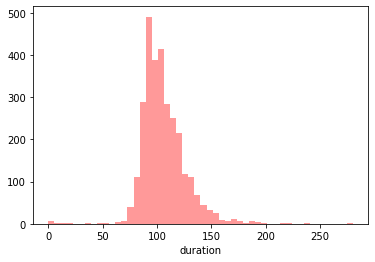

In [27]:
sns.distplot(imdb_movies['duration'],kde=False,color='Red')

In [28]:
imdb_movies.groupby('Main genres')['duration'].mean()

Main genres
Action         111.430514
Adventure      103.096774
Animation       87.157895
Biography      121.528000
Comedy          99.844244
Crime          111.292553
Documentary     91.070175
Drama          111.048237
Family          95.000000
Fantasy        100.631579
History         90.000000
Horror          96.696552
Music           93.000000
Musical        105.000000
Mystery        106.631579
Romance         50.250000
Sci-Fi          96.000000
Thriller        98.100000
Western         81.000000
Name: duration, dtype: float64

In [ ]:
# Best movies based on profit

In [50]:
imdb_movies['Profit']=imdb_movies['gross']-imdb_movies['budget']

In [51]:
imdb_movies

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited,Profit
5,John Stockwell,90.0,T.J. Storm,0.0,Action,Action,Matthew Ziff,Kickboxer: VengeanceÂ,246,Sam Medina,...,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,NaN,USA,17000000.0,2016.0,9.1,0.036992,0,"(2011, 2016]",-17000000.0
6,Christopher Nolan,152.0,Heath Ledger,533316061.0,Action,Action|Crime|Drama|Thriller,Christian Bale,The Dark KnightÂ,1676169,Morgan Freeman,...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,English,USA,185000000.0,2008.0,9.0,0.000005,37000,"(2006, 2011]",348316061.0
9,Peter Jackson,192.0,Billy Boyd,377019252.0,Action,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the KingÂ,1215718,Bernard Hill,...,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,English,USA,94000000.0,2003.0,8.9,0.000007,16000,"(2001, 2006]",283019252.0
14,Christopher Nolan,148.0,Tom Hardy,292568851.0,Action,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,InceptionÂ,1468200,Joseph Gordon-Levitt,...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,English,USA,160000000.0,2010.0,8.8,0.000006,175000,"(2006, 2011]",132568851.0
17,David Fincher,151.0,Meat Loaf,37023395.0,Drama,Drama,Brad Pitt,Fight ClubÂ,1347461,Eugenie Bondurant,...,http://www.imdb.com/title/tt0137523/?ref_=fn_t...,English,USA,63000000.0,1999.0,8.8,0.000007,48000,"(1996, 2001]",-25976605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Don Michael Paul,93.0,Faizon Love,5694308.0,Comedy,Comedy|Sport,Jeffrey Jones,Who's Your Caddy?Â,13815,Lil' Wayne,...,http://www.imdb.com/title/tt0785077/?ref_=fn_t...,English,USA,7000000.0,2007.0,2.0,0.000145,446,"(2006, 2011]",-1305692.0
5038,Jason Friedberg,88.0,Tony Cox,14174654.0,Comedy,Comedy,Carmen Electra,Disaster MovieÂ,74945,Ike Barinholtz,...,http://www.imdb.com/title/tt1213644/?ref_=fn_t...,English,USA,25000000.0,2008.0,1.9,0.000025,0,"(2006, 2011]",-10825346.0
5040,A. Raven Cruz,97.0,Vanilla Ice,0.0,Action,Action|Adventure|Comedy|Fantasy|Sci-Fi,Scott Levy,The Helix... LoadedÂ,534,Jennifer Sky,...,http://www.imdb.com/title/tt0401462/?ref_=fn_t...,English,USA,1000000.0,2005.0,1.9,0.003558,128,"(2001, 2006]",-1000000.0
5041,Lawrence Kasanoff,91.0,Larry Miller,0.0,Action,Action|Animation|Comedy|Family|Fantasy,Jerry Stiller,Foodfight!Â,4377,Harvey Fierstein,...,http://www.imdb.com/title/tt0249516/?ref_=fn_t...,English,USA,65000000.0,2012.0,1.7,0.000388,0,"(2011, 2016]",-65000000.0


In [61]:
sort_profit=imdb_movies.sort_values(by='Profit',ascending=False)

In [62]:
sort_profit

,director_name,duration,actor_2_name,gross,Main genres,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,movie_imdb_link,language,country,budget,title_year,imdb_score,Adjusted,movie_facebook_likes,Year Edited,Profit
328,James Cameron,178.0,Joel David Moore,760505847.0,Action,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,Wes Studi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9,0.000009,33000,"(2006, 2011]",523505847.0
1595,Colin Trevorrow,124.0,Judy Greer,652177271.0,Action,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic WorldÂ,418214,Omar Sy,...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,English,USA,150000000.0,2015.0,7.0,0.000017,150000,"(2011, 2016]",502177271.0
509,James Cameron,194.0,Kate Winslet,658672302.0,Drama,Drama|Romance,Leonardo DiCaprio,TitanicÂ,793059,Gloria Stuart,...,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,English,USA,200000000.0,1997.0,7.7,0.000010,26000,"(1996, 2001]",458672302.0
184,Joss Whedon,173.0,Robert Downey Jr.,623279547.0,Action,Action|Adventure|Sci-Fi,Chris Hemsworth,The AvengersÂ,995415,Scarlett Johansson,...,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,English,USA,220000000.0,2012.0,8.1,0.000008,123000,"(2011, 2016]",403279547.0
2564,George Lucas,136.0,Liam Neeson,474544677.0,Action,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom MenaceÂ,534658,Ian McDiarmid,...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,English,USA,115000000.0,1999.0,6.5,0.000012,13000,"(1996, 2001]",359544677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,Bryan Singer,114.0,Ewen Bremner,65171860.0,Adventure,Adventure|Fantasy,Eddie Marsan,Jack the Giant SlayerÂ,106416,Ralph Brown,...,http://www.imdb.com/title/tt1351685/?ref_=fn_t...,English,USA,195000000.0,2013.0,6.3,0.000059,22000,"(2011, 2016]",-129828140.0
2931,Carl Rinsch,128.0,Cary-Hiroyuki Tagawa,38297305.0,Action,Action|Adventure|Drama|Fantasy,Keanu Reeves,47 RoninÂ,116994,Jin Akanishi,...,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,English,USA,175000000.0,2013.0,6.3,0.000054,35000,"(2011, 2016]",-136702695.0
3589,Peter Berg,131.0,Alexander SkarsgÃ¥rd,65173160.0,Action,Action|Adventure|Sci-Fi|Thriller,Liam Neeson,BattleshipÂ,202382,Tadanobu Asano,...,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,English,USA,209000000.0,2012.0,5.9,0.000029,44000,"(2011, 2016]",-143826840.0
2361,Robert Zemeckis,100.0,Eddie Deezen,665426.0,Adventure,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar ExpressÂ,120798,Peter Scolari,...,http://www.imdb.com/title/tt0338348/?ref_=fn_t...,English,USA,165000000.0,2004.0,6.6,0.000055,10000,"(2001, 2006]",-164334574.0


In [63]:
sort_profit.loc[:,['director_name','actor_1_name','movie_title','Main genres','Profit']]

,director_name,actor_1_name,movie_title,Main genres,Profit
328,James Cameron,CCH Pounder,AvatarÂ,Action,523505847.0
1595,Colin Trevorrow,Bryce Dallas Howard,Jurassic WorldÂ,Action,502177271.0
509,James Cameron,Leonardo DiCaprio,TitanicÂ,Drama,458672302.0
184,Joss Whedon,Chris Hemsworth,The AvengersÂ,Action,403279547.0
2564,George Lucas,Natalie Portman,Star Wars: Episode I - The Phantom MenaceÂ,Action,359544677.0
...,...,...,...,...,...
2929,Bryan Singer,Eddie Marsan,Jack the Giant SlayerÂ,Adventure,-129828140.0
2931,Carl Rinsch,Keanu Reeves,47 RoninÂ,Action,-136702695.0
3589,Peter Berg,Liam Neeson,BattleshipÂ,Action,-143826840.0
2361,Robert Zemeckis,Tom Hanks,The Polar ExpressÂ,Adventure,-164334574.0
